<img style="float: left;;" src='https://github.com/gdesirena/Procesamiento_Natural_del_Lenguaje_2024/blob/main/Modulo%20II/Figures/alinco.png?raw=1' /></a>

# Modulo I: Construyendo y visualizando frecuencias de palabras

En este apartado, nos centraremos en la función auxiliar `build_freqs()` y en la visualización de un conjunto de datos introducido en ella. En nuestro objetivo de análisis de sentimiento de tweets, esta función construirá un diccionario donde podemos buscar cuántas veces aparece una palabra en las listas de tweets positivos o negativos.

Iniciamos importando las librerías

In [1]:
import nltk # librería para NLP
from nltk.corpus import twitter_samples # Ejemplo de conjunto de datos de Twitter de NLTK
import matplotlib.pyplot as plt # biblioteca para visualización
import numpy as np

#### Importaremos algunas funciones auxiliares que proporcionamos en el archivo utils.py:

* `process_tweet()`: Limpia el texto, lo convierte en token en palabras separadas, elimina las palabras vacías y convierte las palabras en raíces.
* `build_freqs()`: Cuenta la frecuencia con la que una palabra del "corpus" (el conjunto completo de tweets) se asoció con una etiqueta positiva "1" o una etiqueta negativa "0". Luego construye el diccionario `freqs`, donde cada clave es una tupla` (palabra, etiqueta) `, y el valor es el recuento de su frecuencia dentro del corpus de tweets.

In [2]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# importar algunas funciones from utilss import Utilities as ut

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from utils import process_tweet

## Cargar el conjunto de datos de muestra NLTK

Utilizaremos la [base de datos de tweeter de NLTK](http://www.nltk.org/howto/twitter.html#Using-a-Tweet-Corpus).

In [9]:
nltk.download('twitter_samples')
# seleccionar la lista de tweets positivos y negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenar los tweets positivos y negativos
tweets = all_positive_tweets + all_negative_tweets
# ver número de tweets
print(len(tweets))

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


10000


A continuación, crearemos una matriz de etiquetas que coincida con los sentimientos de nuestros tweets. Este tipo de datos funciona de forma muy similar a una lista normal, pero está optimizado para cálculos y manipulación. La matriz `labels` estará compuesta por 10000 elementos. Los primeros 5000 se llenarán con etiquetas "1" que denotan sentimientos positivos, y los siguientes 5000 serán etiquetas "0" que denotan lo contrario. Podemos hacer esto fácilmente con una serie de operaciones proporcionadas por la biblioteca `numpy`:

* `np.ones()`
* `np.zeros()`
* `np.append()` - concatena arrays

In [10]:
# crear un arreglo de numpy que represente las etiquetas de los tweets
np.ones((len(all_positive_tweets)))

array([1., 1., 1., ..., 1., 1., 1.])

In [11]:
np.zeros((len(all_negative_tweets)))

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [13]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

## Recordatorio de uso de dicionarios

In [14]:
dictionary = {'key1':1, 'key2':2}
dictionary['key1']

1

In [16]:
dictionary.items()

dict_items([('key1', 1), ('key2', 2)])

In [19]:
dictionary.values(), dictionary.keys()

(dict_values([1, 2]), dict_keys(['key1', 'key2']))

### Indexar en valores y keys


In [20]:
for k,v in dictionary.items():
  print(f'{k}: {v}')

key1: 1
key2: 2


## Diccionario de frecuencia de palabras

Echemos un vistazo a la función **build_freqs()** en **utils.py**. Esta es la función que crea el diccionario que contiene los recuentos de palabras de cada corpus.

```python
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs
```

In [ ]:
build_freqs(tweets, labels)

Como se muestra arriba, cada clave es una tupla de 2 elementos que contiene un par "(palabra, y)". La "palabra" es un elemento en un tweet procesado, mientras que "y" es un número entero que representa el corpus: "1" para los tweets positivos y "0" para los tweets negativos. El valor asociado con esta clave es el número de veces que esa palabra aparece en el corpus especificado. Por ejemplo:

```
# "folowfriday" aparece 25 veces en los tweets positivos
('sigue el viernes', 1.0): 25

# "shame" aparece 19 veces en los tweets negativos
('shame', 0.0): 19
```

Ahora es el momento de usar el diccionario devuelto por la función `build_freqs()`. Primero, alimentemos nuestras listas de `tweets` y` etiquetas` y luego imprimamos un informe básico:

In [21]:
from utilss import Utilities as prep

In [22]:
a = prep()

This is the Utilities Constructor


In [23]:
freqs = a.build_freqs(tweets, labels)

Imprimir la frecuencia de cada palabra dependiendo de su clase:

In [24]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


Desafortunadamente, esto no ayuda mucho a comprender los datos. Sería mejor visualizar este resultado para obtener mejores conocimientos.

## Tabla de recuentos de palabras

Seleccionaremos un conjunto de palabras que nos gustaría visualizar. Es mejor almacenar esta información temporal en una tabla que sea muy fácil de usar más adelante.

In [25]:
# algunas palabras
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []

for word in keys:
  #inicializamos pos, neg
  pos = 0
  neg = 0

  if (word,1) in freqs:
    #Obteniendo el número de veces que aparece la palabra en los tweets positivos
    pos = freqs[(word,1)]
  if (word, 0) in freqs:
    #Obteniendo el número de veces que aparece la palabra en los tweets negativos
    neg = freqs[(word,0)]

  data.append([word, pos, neg])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

Luego podemos usar un diagrama de dispersión para inspeccionar esta tabla visualmente. En lugar de graficar los conteos sin procesar, lo trazaremos en la escala logarítmica para tener en cuenta las amplias discrepancias entre los conteos sin procesar (por ejemplo, `:)` tiene 3568 conteos en positivo mientras que solo 2 en negativo). La línea roja marca el límite entre las áreas positivas y negativas. Las palabras cercanas a la línea roja se pueden clasificar como neutrales.

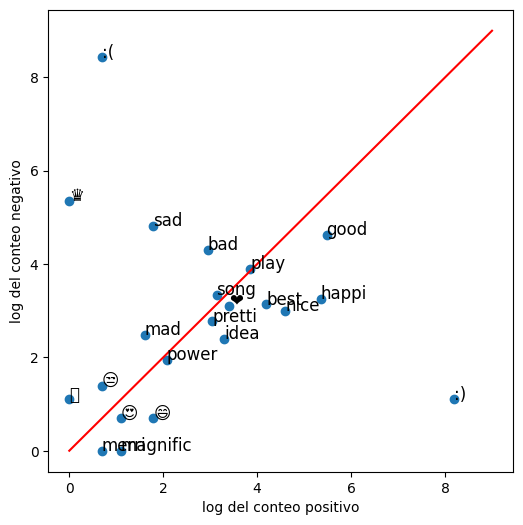

In [29]:
fig, ax = plt.subplots(figsize=(6,6))

x = np.log([x[1] + 1 for x in data]) #elementos positivos

y = np.log([x[2] +1 for x in data])  #elementos negativos

ax.scatter(x,y)

plt.xlabel('log del conteo positivo')
plt.ylabel('log del conteo negativo')

#añadir las etiquetas de las palabras
for i in range(0, len(data)):
  ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0,9], [0,9], color = 'red')
plt.show()


Este cuadro es sencillo de interpretar. Muestra que los emoticones `:)` y `: (` son muy importantes para el análisis de sentimientos. Por lo tanto, ¡no debemos permitir que los pasos de preprocesamiento eliminen estos símbolos!

¿Qué pasa con el símbolo de la corona?